# **Análisis, Visualización y Curación de Datos**

# Consigna 3

#### Elegir (al menos) tres variables, las cuales crean que pueden estar correlacionadas con la satisfacción del estudiante al terminar el diálogo. Para cada una de ellas calcular la probabilidad de que el estudiante dé una evaluación negativa (1 o 2), condicionada a esa variable.

---

## Importación de librerías

In [ ]:
# Cargo las librerías
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

from columns_to_keep import C2K
from type_to_fix import T2F

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Carga de la tabla de metadata
---


In [ ]:
data_dir = os.path.join('..', 'dataset')
data_file_name = 'datadump-20150801-20171219.csv'
full_data_file_name = os.path.join(data_dir, data_file_name)
df = pd.read_csv(full_data_file_name)
display(df.shape)


In [ ]:
df = pd.read_csv('datadump-20150801-20171219.csv', low_memory=False)
display(df.shape)

(63265, 111)

In [ ]:
# Remuevo espacios al inicio y final del nombre de la columna
df.columns = [column.strip() for column in df.columns]

# Selecciono solo las columnas que vamos a necesitar
df = df[C2K]

# Se corrigen los tipos de los datos 
df = df.astype(T2F)

# se eliminan los valores iguales a cero en la variable student_rating, ya que dicha variable sólo puede tomar valores entre 1 y 5.
df = df.drop(df[df.student_rating==0].index)
print("El dataframe tiene", df.shape[0], "filas y ", df.shape[1], "columnas.")

El dataframe tiene 63251 filas y  39 columnas.


## Pre-procesamiento de los datos
---

#### Pasos:

1.   Selección de las variables que se analizaran para determinar si las mismas tienen una correlación positiva con la variable **student_rating**, con el fin de determinar si dichas variables **wait_time, avg_tutor_response_time  y feedback_score.** influyen sobre  el puntaje asignado al tutor (student_rating).
1. Eliminación de los valores NA de las variables seleccionadas.
1. Convierto las variables wait_time y avg_tutor_response_time de segundos a minutos.
1. Se grafica la relación entre student_rating y las variables elegidas.
1. Cálculo del coeficiente de correlación de Spearman.

1. Las variables seleccionadas para analizar la correlación son:
  - **wait_time:** cuánto tiempo esperó el estudiante antes de ser emparejado con un tutor expresado en segundos ((escala entre 1 y 5).
  - **avg_tutor_response_time:** tiempo promedio en segundos desde la presentación del estudiante hasta el enunciado del tutor.
  - **feedback_score:** puntaje asignado a la sesión (escala entre 0 y 1).

In [ ]:
# 1 y 2. 
df_sinNA = df.dropna(axis=0, subset=['student_rating', 'wait_time', 'avg_tutor_response_time', 'feedback_score'])

df_graficos = df_sinNA.loc[:, ['student_rating', 'wait_time', 'avg_tutor_response_time', 'feedback_score']]
display(df_graficos)
df_graficos.shape
print(" ")
print ("Luego de la limpieza, obtengo un dataframe de", df_sinNA.shape[0],"filas y", df_sinNA.shape[1], "col.")

,student_rating,wait_time,avg_tutor_response_time,feedback_score
0,4,45.310611,37.511199,0.4
2,1,10.116270,24.202020,0.0
4,5,7.960689,16.089307,0.8
5,5,4.961054,11.646825,1.0
7,5,5.874542,20.362733,0.9
...,...,...,...,...
63260,5,17.600104,25.465734,0.7
63261,5,10.166931,12.848288,1.0
63262,5,7.834611,11.901485,1.0
63263,5,6.487123,17.574211,1.0


 
Luego de la limpieza, obtengo un dataframe de 44898 filas y 39 col.


In [ ]:
# 3. convierto de secs a minutos  
df_graficos['wait_time'] = (df_sinNA['wait_time'] / 60)
df_graficos['wait_time'] = round(df_graficos['wait_time'],1)

df_graficos['avg_tutor_response_time'] = (df_sinNA['avg_tutor_response_time'] / 60)
df_graficos['avg_tutor_response_time'] = round(df_graficos['avg_tutor_response_time'],1)
display(df_graficos)

,student_rating,wait_time,avg_tutor_response_time,feedback_score
0,4,0.8,0.6,0.4
2,1,0.2,0.4,0.0
4,5,0.1,0.3,0.8
5,5,0.1,0.2,1.0
7,5,0.1,0.3,0.9
...,...,...,...,...
63260,5,0.3,0.4,0.7
63261,5,0.2,0.2,1.0
63262,5,0.1,0.2,1.0
63263,5,0.1,0.3,1.0


## 4. **¿Existe alguna variable que influya sobre la satisfacción de los estudiantes?**

La visualización de datos es una parte fundamental de cualquier análisis de datos, ya que no sólo se utiliza para comunicar los hallazgos o resultados finales  sino que también son de suma importancia en la etapa de exploración de datos para confirmar o rechazar hipótesis planteadas acerca de los datos  utilizados. Entonces para verificar si existe alguna variable que influya en la satisfacción de los estudiantes por un lado, se utilizarán gráficos y por el otro, se calculará el coeficiente de correlación de Spearman.
A continuación utilizaremos tres tipos distintos de gráficos, primero un regplot o gráfico de regresión lineal, luego un scatterplot o gráfico de dispersión y por último un pairplot. Cada uno nos permitirá observar si existe  relación entre `student_rating` y las variables elegidas `wait_time`, `avg_tutor_response_time` y `feedback_score`.




##**Gráfico de regresión lineal entre las variables student_rating y wait_time**

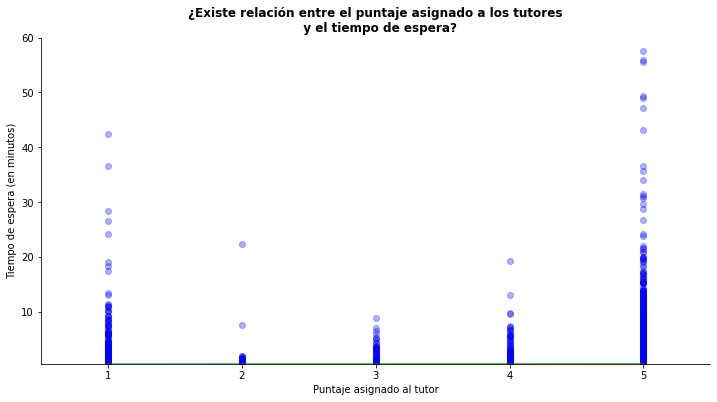

In [ ]:
# 4. Gráfico de regresión lineal entre student_rating y wait_time

plt.figure(figsize=(12,6))
seaborn.regplot(x=df_graficos.student_rating.astype(float), y=df_graficos.wait_time.astype(float), scatter_kws={'color':'blue', 'alpha':0.3},line_kws={'color':'green'})
plt.title('¿Existe relación entre el puntaje asignado a los tutores\n  y el tiempo de espera?',
             fontsize=12, weight="bold")
plt.xlabel('Puntaje asignado al tutor')
plt.ylabel('Tiempo de espera (en minutos)')
plt.ylim([0.5, 60])
plt.xlim([0.5, 5.5])
seaborn.despine()
plt.show()

 Luego de observar el gráfico obtenido, se observan puntos dispersos y una recta que no aproxima  dichos valores, por lo que se evidencia que no existe una relación entre ambas variables, por lo tanto la variable `tiempo de espera `no influiría sobre el comportamiento de la variable `puntaje asignado a los tutores` . El cálculo del coeficiente de spearman en el punto 5 permitirá confirmar dicha afirmación.

## **Scatterplot entre las variables student_rating y avg_tutor_response_time**


El gráfico de dispersión o scatterplot permite verificar si existe o no correlación entre las variables student_rating (puntaje asignado a los tutores) y avg_tutor_response_time (tiempo promedio de respuesta del tutor).


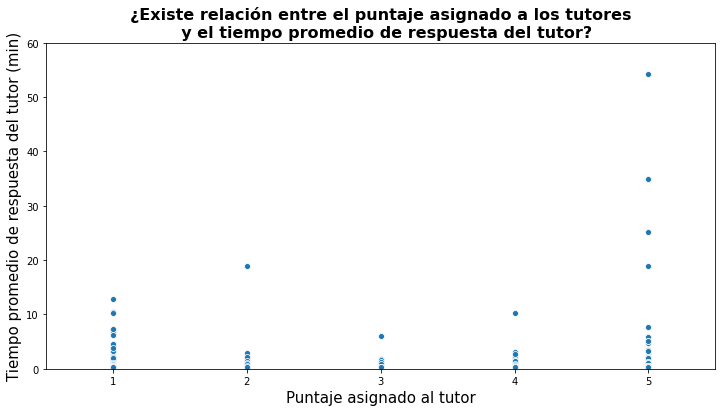

In [ ]:
plt.figure(figsize=(12,6))  

seaborn.scatterplot(x=df_graficos.student_rating.astype(float), y=df_graficos.avg_tutor_response_time.astype(float)) 
plt.title('¿Existe relación entre el puntaje asignado a los tutores\n  y el tiempo promedio de respuesta del tutor?',fontsize=16, weight="bold")
plt.xlabel('Puntaje asignado al tutor', fontsize=15)
plt.ylabel('Tiempo promedio de respuesta del tutor (min)', fontsize=15)
plt.xlim([0.5, 5.5])
plt.ylim([0, 60])
plt.show()            

Luego de observar el gráfico obtenido, se aprecian puntos dispersos que no siguen ningún patrón y se evidencia que no existe correlación entre ambas variables, esto además se verificará en el punto 5 con el cálculo del coeficiente de Spearman.

## **Scatterplot entre las variables student_rating y feedback_score**


El gráfico de dispersión o scatterplot permite verificar si existe o no correlación entre las variables student_rating (puntaje asignado a los tutores) y feedback_score (feedback de la sesión).

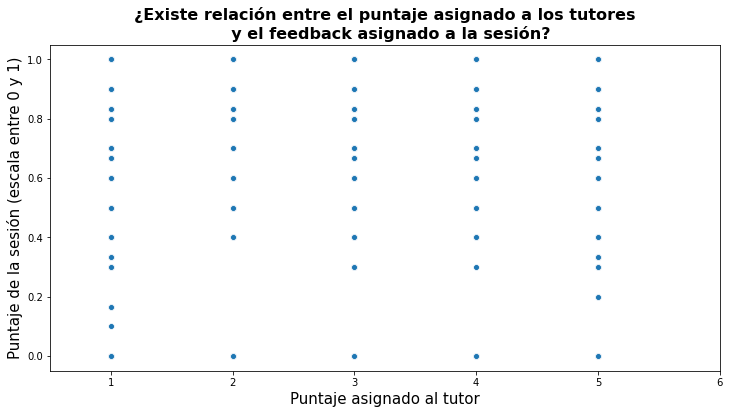

In [ ]:
plt.figure(figsize=(12,6))  
seaborn.scatterplot(x=df_graficos.student_rating, y=df_graficos.feedback_score) 
plt.title('¿Existe relación entre el puntaje asignado a los tutores\n  y el feedback asignado a la sesión?',fontsize=16, weight="bold")
plt.xlabel('Puntaje asignado al tutor', fontsize=15)
plt.ylabel('Puntaje de la sesión (escala entre 0 y 1)', fontsize=15)
plt.xlim([0.5, 6])
plt.show() 

Luego de observar el gráfico obtenido, se evidencia que no existe correlación  entre el puntaje asignado al tutor y el feedback de la sesión, esto además se verificará en el punto 5 con el cálculo del coeficiente de Spearman.





## **Gráfico pairplot entre student_rating y las variables wait_time, avg_tutor_response_time y feedback_score.**

Por último, se utilizará un gráfico del tipo pairplot,  el cual permitirá observar de manera rápida las relaciones entre las variables del dataframe  `df_pairplot`, descripto a continuación.

<Figure size 864x504 with 0 Axes>

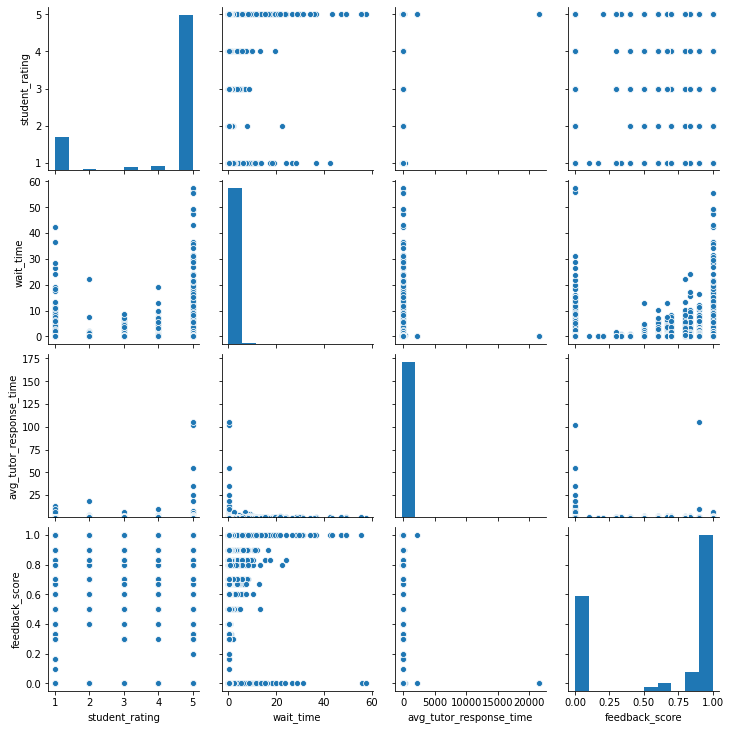

In [ ]:
df_pairplot = df_graficos.loc[:, ['student_rating', 'wait_time', 'avg_tutor_response_time', 'feedback_score']]
plt.figure(figsize=(12,7))
seaborn.pairplot(data= df_pairplot)
plt.ylim([0.5, 180])
plt.show()

En el pairplot se observa cómo se grafican por cada par de valores, un histograma y un gráfico de dispersión. Este ayuda a verificar los hallazgos encontrados en los gráficos anteriores, respecto a que no existe una relación los suficientemente fuerte entre `el puntaje asignado al tutor` y las variables analizadas que permita afirmar que alguna de ellas influye sobre dicho puntaje. 

 ## **5.Cálculo de coeficientes de correlación utilizando el método de Spearman**


En este punto, mediante el cálculo del coeficiente de correlación se verificarán los hallazgos encontrados en el punto 4.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
dfspearman = df[["student_rating", "wait_time", "feedback_score", "length_of_session", "avg_tutor_response_time"]].dropna().sort_values('student_rating')


## **¿Existe correlación entre las variables student_rating y wait_time?** 

In [ ]:
spearman_p2 = spearmanr(dfspearman['student_rating'],dfspearman['wait_time'])
display(spearman_p2)

SpearmanrResult(correlation=-0.005554422719821421, pvalue=0.23955038005708534)

Con este resultado se confirma lo observado en el gráfico de regresión lineal, es decir, que no existe influencia de la variable `tiempo de espera` sobre el comportamiento del `puntaje asignado a los tutores`.

##  **¿Existe correlación entre las variables student_rating y feedback_score?**

In [ ]:
spearman_p = spearmanr(dfspearman['student_rating'],dfspearman['feedback_score'])
display(spearman_p)

SpearmanrResult(correlation=0.28743640456627073, pvalue=0.0)

El valor del coeficiente de correlación es bastante bajo, por lo que con este resultado se confirma lo observado en el gráfico de dispersión, es decir,  que no existe influencia de la variable `feedback de la sesión` sobre el `puntaje asignado a los tutores`.

## **¿Existe correlación entre las variables student_rating y avg_tutor_response_time?**

In [ ]:
spearman_p4 = spearmanr(dfspearman['student_rating'],dfspearman['avg_tutor_response_time'])
display(spearman_p4)

SpearmanrResult(correlation=-0.08054335545485349, pvalue=2.016065258359058e-65)

Con el anterior resultado se confirma lo observado en el gráfico de dispersión, es decir, que no existe influencia de la variable `tiempo promedio de respuesta del tutor` sobre el `puntaje asignado a los tutores`.

## **Conclusión.**
 Luego de verificar si existía alguna correlación entre `student_rating` y las variables` wait_time`, `avg_tutor_time_response` y `feedback_score`, mediante la visualización de dichas variables con distintos gráficos y el cálculo del coeficiente de Spearman, se puede afirmar que no se encontró evidencia que 
permita establecer alguna relación lo suficientemente fuerte entre el `puntaje asignado a los tutores` y las variables seleccionadas, que  indique influencia de algunas de ellas sobre el comportamiento de la variable `satisfacción del estudiante. `

 
